In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import pandas as pd
import matplotlib.ticker as ticker
import scipy
# import the lib we need later

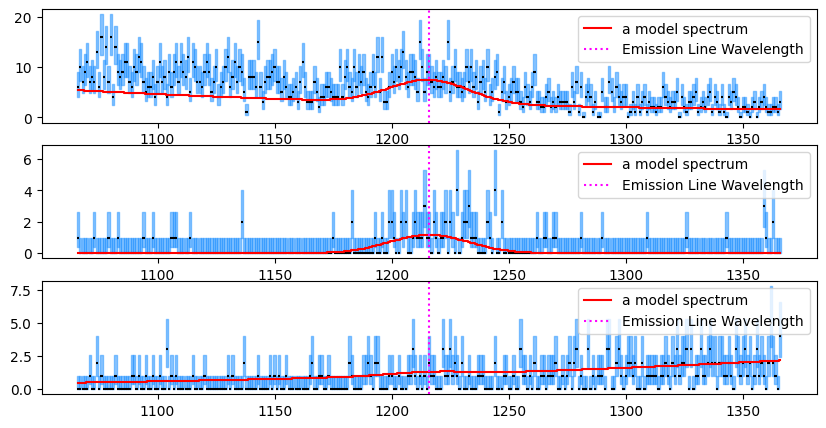

In [3]:
# homewrok 9
# a)

spectra = pd.read_csv('data/spectra.csv')
# load the spectra data into notebook

spectra_wavelength = np.array(spectra['wavelength'])
spectra_k_lam_1 = np.array(spectra['k_lam_1'])
spectra_k_lam_2 = np.array(spectra['k_lam_2'])
spectra_k_lam_3 = np.array(spectra['k_lam_3'])
# get all the data from the csv to a way which is easier to work with  

"""
for the first spectra, when lam is 1200 A, we can know that N_lam is very close to N_count
form the origin datat, we can know that k_lam_1 is 9, and all the data of k_lam_1 is larger than 3
I think it is reasonalbe to say the N_count should be 3
The total line looks like decreasing
it is reasonalbe to say that the alpha is a negative number,
it decease from around 15 to 0, and the wavelength over 1200 go from 0.9 to 1.16
Thus, it is reasonable to set alpha to be large, I take -5 as a good guess
from the formular of gaussain distribution, we can know that the frequecny of mean at this standard divation is 0.023
I can get a guess of N_line with k_lam at 1216 is 9
since wavelength over 1200 is still samll, I will consider the total formula to be N_count + N_line*0.023
Therefore, it is reasonalbe to guess N_line to be 200
"""

guess_N_count_1 = 3
guess_alpha_1 = -5
guess_N_line_1 =  200
guess_N_lam_1 = np.array(guess_N_count_1*(spectra_wavelength/1200)**guess_alpha_1+guess_N_line_1*np.exp(-0.5 * ((spectra_wavelength - 1216) / 17) ** 2) / (17 * np.sqrt(2 * np.pi)))

"""
for the second spectra, when lam is 1200 A, we can know that N_lam is very close to N_count
form the origin datat, we can know that k_lam_2 is 2, and all the data of k_lam_2 is close to 0
I think it is reasonalbe to say the N_count should be very small, 0
The total line looks like increase a little, since the larger part is silightly larger than the samller part
it is reasonalbe to say that the alpha is a positive number,
it basically does not increase
Thus, it is reasonable to set alpha to be very small, I take 1 as a good guess
from the formular of gaussain distribution, we can know that the frequecny of mean at this standard divation is 0.023
I can get a guess of N_line with k_lam at 1216 is 1
since wavelength over 1200 is still samll, I will consider the total formula to be N_count + N_line*0.023
Therefore, it is reasonalbe to guess N_line to be 50
"""

guess_N_count_2 = 0
guess_alpha_2 = 1
guess_N_line_2 =  50
guess_N_lam_2 = np.array(guess_N_count_2*(spectra_wavelength/1200)**guess_alpha_2+guess_N_line_2*np.exp(-0.5 * ((spectra_wavelength - 1216) / 17) ** 2) / (17 * np.sqrt(2 * np.pi)))

"""
for the third spectra, when lam is 1200 A, we can know that N_lam is very close to N_count
form the origin datat, we can know that k_lam_3 is 1, and all the data of k_lam_2 is very close to 0
I think it is reasonalbe to say the N_count should be small, 1
The total line looks like increase a little, since the larger part is silightly larger than the samller part
it is reasonalbe to say that the alpha is a positive number,
it increase a bit, from around 0 to 2.5
Thus, it is reasonable to set alpha to be larger, I take 6 as a good guess
from the formular of gaussain distribution, we can know that the frequecny of mean at this standard divation is 0.023
I can get a guess of N_line with k_lam at 1216 is 2, and the guassain is not so obvious
since wavelength over 1200 is still samll, I will consider the total formula to be N_count + N_line*0.023
Therefore, it is reasonalbe to guess N_line to be 10
"""

guess_N_count_3 = 1
guess_alpha_3 = 6
guess_N_line_3 =  10
guess_N_lam_3 = np.array(guess_N_count_3*(spectra_wavelength/1200)**guess_alpha_3+guess_N_line_3*np.exp(-0.5 * ((spectra_wavelength - 1216) / 17) ** 2) / (17 * np.sqrt(2 * np.pi)))


# get the function of drawing graph from the problem
def plot_spectrum(ax, wave, k_lam): 
    """
    Utility function to plot a spectrum in the low photon regime. 
    
    Parameters
    ----------
        ax: matplotlib axis object
            The axis to plot the spectrum on. This is a matplotlib axes object created by i.e. 
            the object oriented API of matplotlib. 
        wave: array-like
            The wavelength array of the spectrum.
        k_lam: array-like
            The observed integer number of photons detected per wavelength bin.
    
    """

    # Calculate bin midpoints
    bin_widths = np.diff(wave) / 2.0
    bin_widths = np.append(bin_widths[0], bin_widths)*0.97
    k_lam_lower = k_lam + 0.5 - np.sqrt(k_lam + 0.25)
    k_lam_upper = k_lam + 0.5 + np.sqrt(k_lam + 0.25)
 
    for wv, bin_width, kval, kval_lo, kval_hi in zip(wave, bin_widths, k_lam, k_lam_lower, k_lam_upper):
        # Draw rectangles for the error bars
        ax.fill_betweenx([kval_lo, kval_hi], wv-bin_width, wv+bin_width, color='dodgerblue', alpha=0.5)
        # Draw horizontal lines for the measured value
        ax.hlines(kval, wv-bin_width, wv+bin_width, color='black', linestyle='-')
    return

fig, ax = plt.subplots(3,1,figsize = (10,5))
# get the general configeration of diagram
plot_spectrum(ax[0],spectra_wavelength,spectra_k_lam_1)
ax[0].plot(spectra_wavelength,guess_N_lam_1,color='red',drawstyle='steps-mid',label='a model spectrum')
ax[0].axvline(1216,color='magenta', linestyle=':',label='Emission Line Wavelength')
ax[0].legend()
# plot the first graph

plot_spectrum(ax[1],spectra_wavelength,spectra_k_lam_2)
ax[1].plot(spectra_wavelength,guess_N_lam_2,color='red',drawstyle='steps-mid',label='a model spectrum')
ax[1].axvline(1216,color='magenta', linestyle=':',label='Emission Line Wavelength')
ax[1].legend()
# plot the second graph

plot_spectrum(ax[2],spectra_wavelength,spectra_k_lam_3)
ax[2].plot(spectra_wavelength,guess_N_lam_3,color='red',drawstyle='steps-mid',label='a model spectrum')
ax[2].axvline(1216,color='magenta', linestyle=':',label='Emission Line Wavelength')
ax[2].legend()
# plot the third graph

In [4]:
# b)


import scipy.special
import scipy.stats


def postive_lnL(theta, wave, k_lam):
    """
    The log-likelihood function for the spectrum.
    
    Parameters
    ----------
        theta: array-like
            The model parameters.  
        wave: array-like
            The wavelength array of the spectrum.
        k_lam: array-like
            The observed number of photons detected per wavelength bin.
    
    Returns
    -------
        lnL: float
            The log-likelihood of the model given the data.
    """
    N_count = theta[0]
    alpha = theta[1]
    N_line = theta[2]
    # get the value of model parameters
    N_lam = np.array(N_count*(wave/1200)**alpha+N_line*np.exp(-0.5 * ((wave - 1216) / 17) ** 2) / (17 * np.sqrt(2 * np.pi)))
    # create the model value from the model parameters
    lnL = np.sum(scipy.stats.poisson.logpmf(k_lam,N_lam))
    # calculate ln likelihood
    return lnL


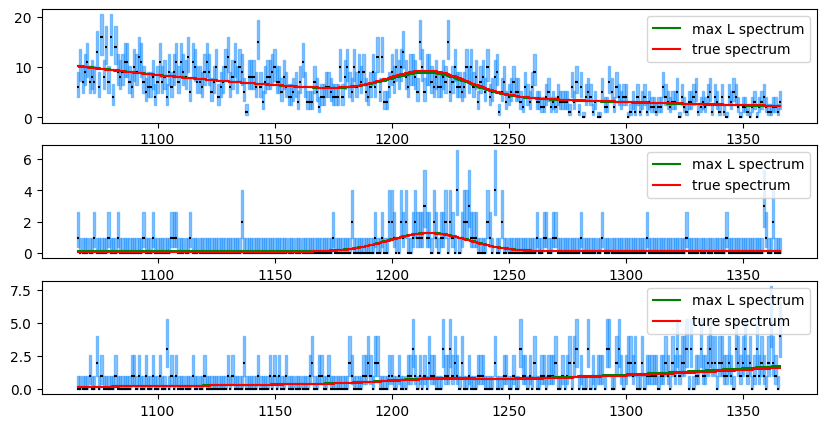

In [5]:
# c)

import scipy.optimize

def lnL(theta,wave,k_lam):
    return -postive_lnL(theta,wave,k_lam)

theta_guess = np.array([3,-5,200])
# get the first guess
theta_min_1 = scipy.optimize.minimize(lnL,theta_guess,args=(spectra_wavelength,spectra_k_lam_1),bounds=((0,np.inf),(-np.inf,np.inf),(0,np.inf)))
# get the min value
theta_min_1 = theta_min_1['x']
# get the theta for the first guess
maxL_lam_1 = np.array(theta_min_1[0]*(spectra_wavelength/1200)**theta_min_1[1]+theta_min_1[2]*np.exp(-0.5 * ((spectra_wavelength - 1216) / 17) ** 2) / (17 * np.sqrt(2 * np.pi)))
# get the line of max L

theta_guess = np.array([0,1,50])
# get the first guess
theta_min_2 = scipy.optimize.minimize(lnL,theta_guess,args=(spectra_wavelength,spectra_k_lam_2),bounds=((0,np.inf),(-np.inf,np.inf),(0,np.inf)))
# get the min value
theta_min_2 = theta_min_2['x']
# get the theta for the first guess
maxL_lam_2 = np.array(theta_min_2[0]*(spectra_wavelength/1200)**theta_min_2[1]+theta_min_2[2]*np.exp(-0.5 * ((spectra_wavelength - 1216) / 17) ** 2) / (17 * np.sqrt(2 * np.pi)))
# get the line of max L

theta_guess = np.array([1,6,10])
# get the first guess
theta_min_3 = scipy.optimize.minimize(lnL,theta_guess,args=(spectra_wavelength,spectra_k_lam_3),bounds=((0,np.inf),(-np.inf,np.inf),(0,np.inf)))
# get the min value
theta_min_3 = theta_min_3['x']
# get the theta for the first guess
maxL_lam_3 = np.array(theta_min_3[0]*(spectra_wavelength/1200)**theta_min_3[1]+theta_min_3[2]*np.exp(-0.5 * ((spectra_wavelength - 1216) / 17) ** 2) / (17 * np.sqrt(2 * np.pi)))
# get the line of max L

true_params = pd.read_csv('data/true_params.csv',comment='#')
# get the true values to python

true_params_N_count = np.array(true_params['N_cont'])
true_params_alpha = np.array(true_params['alpha'])
true_params_N_line = np.array(true_params['N_line'])
# assign with good name

true_params_N_lam_1 = np.array(true_params_N_count[0]*(spectra_wavelength/1200)**true_params_alpha[0]+true_params_N_line[0]*np.exp(-0.5 * ((spectra_wavelength - 1216) / 17) ** 2) / (17 * np.sqrt(2 * np.pi)))
true_params_N_lam_2 = np.array(true_params_N_count[1]*(spectra_wavelength/1200)**true_params_alpha[1]+true_params_N_line[1]*np.exp(-0.5 * ((spectra_wavelength - 1216) / 17) ** 2) / (17 * np.sqrt(2 * np.pi)))
true_params_N_lam_3 = np.array(true_params_N_count[2]*(spectra_wavelength/1200)**true_params_alpha[2]+true_params_N_line[2]*np.exp(-0.5 * ((spectra_wavelength - 1216) / 17) ** 2) / (17 * np.sqrt(2 * np.pi)))
# generate the value of true value


fig, ax = plt.subplots(3,1,figsize = (10,5))
# get the general configeration of diagram
plot_spectrum(ax[0],spectra_wavelength,spectra_k_lam_1)
ax[0].plot(spectra_wavelength,maxL_lam_1,color='green',drawstyle='steps-mid',label='max L spectrum')
ax[0].plot(spectra_wavelength,true_params_N_lam_1,color='red',drawstyle='steps-mid',label='true spectrum')
ax[0].legend()
# plot the first graph

plot_spectrum(ax[1],spectra_wavelength,spectra_k_lam_2)
ax[1].plot(spectra_wavelength,maxL_lam_2,color='green',drawstyle='steps-mid',label='max L spectrum')
ax[1].plot(spectra_wavelength,true_params_N_lam_2,color='red',drawstyle='steps-mid',label='true spectrum')
ax[1].legend()
# plot the second graph

plot_spectrum(ax[2],spectra_wavelength,spectra_k_lam_3)
ax[2].plot(spectra_wavelength,maxL_lam_3,color='green',drawstyle='steps-mid',label='max L spectrum')
ax[2].plot(spectra_wavelength,true_params_N_lam_3,color='red',drawstyle='steps-mid',label='ture spectrum')
ax[2].legend()
# plot the third graph

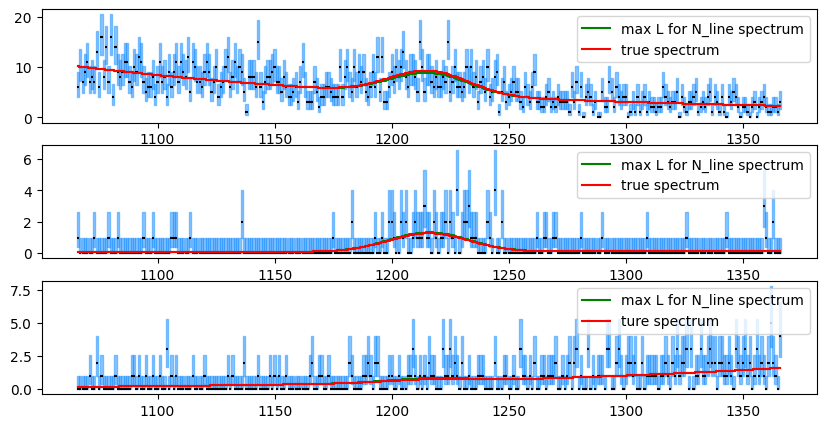

In [6]:
# d)

N_line_min_1 = scipy.optimize.minimize(lnL,[true_params_N_count[0],true_params_alpha[0],200],args=(spectra_wavelength,spectra_k_lam_1),bounds=((true_params_N_count[0],true_params_N_count[0]),(true_params_alpha[0],true_params_alpha[0]),(0,np.inf)))
# get the value to max L N_line
N_line_min_1 = N_line_min_1['x'][2]
# make it to be a value
maxL_N_line_lam_1 = np.array(true_params_N_count[0]*(spectra_wavelength/1200)**true_params_alpha[0]+N_line_min_1*np.exp(-0.5 * ((spectra_wavelength - 1216) / 17) ** 2) / (17 * np.sqrt(2 * np.pi)))
# get the line of max L for N_line

N_line_min_2 = scipy.optimize.minimize(lnL,[true_params_N_count[1],true_params_alpha[1],50],args=(spectra_wavelength,spectra_k_lam_2),bounds=((true_params_N_count[1],true_params_N_count[1]),(true_params_alpha[1],true_params_alpha[1]),(0,np.inf)))
# get the value to max L N_line
N_line_min_2 = N_line_min_2['x'][2]
# make it to be a value
maxL_N_line_lam_2 = np.array(true_params_N_count[1]*(spectra_wavelength/1200)**true_params_alpha[1]+N_line_min_2*np.exp(-0.5 * ((spectra_wavelength - 1216) / 17) ** 2) / (17 * np.sqrt(2 * np.pi)))
# get the line of max L for N_line

N_line_min_3 = scipy.optimize.minimize(lnL,[true_params_N_count[2],true_params_alpha[2],10],args=(spectra_wavelength,spectra_k_lam_3),bounds=((true_params_N_count[2],true_params_N_count[2]),(true_params_alpha[2],true_params_alpha[2]),(0,np.inf)))
# get the value to max L N_line
N_line_min_3 = N_line_min_3['x'][2]
# make it to be a value
maxL_N_line_lam_3 = np.array(true_params_N_count[2]*(spectra_wavelength/1200)**true_params_alpha[2]+N_line_min_3*np.exp(-0.5 * ((spectra_wavelength - 1216) / 17) ** 2) / (17 * np.sqrt(2 * np.pi)))
# get the line of max L for N_line

fig, ax = plt.subplots(3,1,figsize = (10,5))
# get the general configeration of diagram
plot_spectrum(ax[0],spectra_wavelength,spectra_k_lam_1)
ax[0].plot(spectra_wavelength,maxL_N_line_lam_1,color='green',drawstyle='steps-mid',label='max L for N_line spectrum')
ax[0].plot(spectra_wavelength,true_params_N_lam_1,color='red',drawstyle='steps-mid',label='true spectrum')
ax[0].legend()
# plot the first graph

plot_spectrum(ax[1],spectra_wavelength,spectra_k_lam_2)
ax[1].plot(spectra_wavelength,maxL_N_line_lam_2,color='green',drawstyle='steps-mid',label='max L for N_line spectrum')
ax[1].plot(spectra_wavelength,true_params_N_lam_2,color='red',drawstyle='steps-mid',label='true spectrum')
ax[1].legend()
# plot the second graph

plot_spectrum(ax[2],spectra_wavelength,spectra_k_lam_3)
ax[2].plot(spectra_wavelength,maxL_N_line_lam_3,color='green',drawstyle='steps-mid',label='max L for N_line spectrum')
ax[2].plot(spectra_wavelength,true_params_N_lam_3,color='red',drawstyle='steps-mid',label='ture spectrum')
ax[2].legend()
# plot the third graph

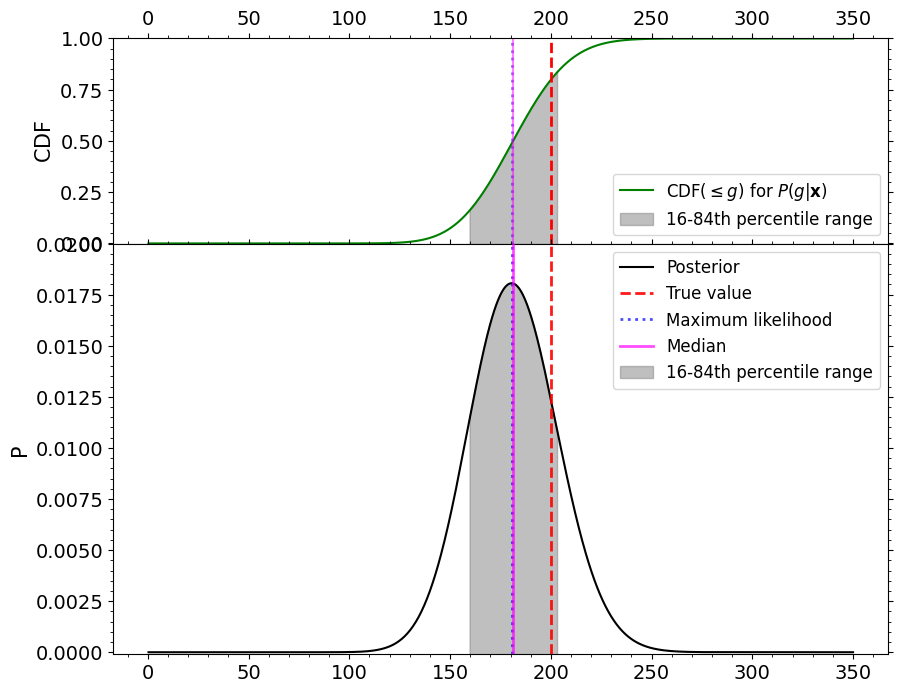

In [7]:
# e)

import scipy.integrate
import scipy.interpolate
import scipy.optimize
import scipy.stats


Pr_N_line = np.linspace(350,0,1000,False)
# get the Pr(N_line) as a unifrom distribution without 0
unif_prior = (Pr_N_line[0] - Pr_N_line[-1])**(-1)
# get the distribution

lnLvalues_1 = [-lnL([true_params_N_count[0],true_params_alpha[0],N_line],spectra_wavelength,spectra_k_lam_1) for N_line in Pr_N_line]
# get ln(L)
P_unnorm_1 = np.exp(lnLvalues_1)*unif_prior
P_norm_1 = -scipy.integrate.trapezoid(P_unnorm_1,Pr_N_line)
# add a negative sign due to the 
posterior_1 = P_unnorm_1/P_norm_1
# calculate the posterior
cdf_1 = 1+scipy.integrate.cumulative_trapezoid(posterior_1,Pr_N_line,initial=0)
# get the cdf
cdf_inverse = scipy.interpolate.interp1d(cdf_1,Pr_N_line)
Pr_N_16 = cdf_inverse(0.16)
Pr_N_50 = cdf_inverse(0.50)
Pr_N_84 = cdf_inverse(0.84)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [1, 2], 'hspace': 0.0})

# Plot the CDF in the upper subplot
ax1.plot(Pr_N_line, cdf_1, color='g', label=r'${\rm CDF}(\leq g)$ for $P(g|\mathbf{x})$')
ax1.fill_between(Pr_N_line, -5, cdf_1, where=((Pr_N_line >= Pr_N_16) & (Pr_N_line <= Pr_N_84)), color='gray', alpha=0.5, label='16-84th percentile range', zorder=1)
# vertical lines at the true, maxL, and median values
ax1.axvline(true_params_N_line[0], color='r', linestyle='--', linewidth=2.0)
ax1.axvline(N_line_min_1, color='b', linestyle=':', alpha=0.5, linewidth=2.0)
ax1.axvline(Pr_N_50, color='magenta', linestyle='-', alpha=0.5)

ax1.set_ylabel(r'${\rm CDF}$', fontsize=15)
ax1.legend(loc='lower right', fontsize=12)
ax1.set_ylim(-0.001,1.001)

# Plot the posterior distribution in the lower subplot
ax2.plot(Pr_N_line, posterior_1, color='k', label=r'Posterior')
# vertical lines at the true, maxL, and median values
ax2.axvline(true_params_N_line[0], color='r', linestyle='--', alpha=0.9, linewidth=2.0, label=r'True value', zorder=3)
ax2.axvline(N_line_min_1, color='b', linestyle=':', linewidth=2.0, alpha=0.7, label=r'Maximum likelihood', zorder=3)
ax2.axvline(Pr_N_50, color='magenta', linestyle='-', linewidth=2.0, alpha=0.7, label=r'Median', zorder=4)
ax2.fill_between(Pr_N_line, -10.0, posterior_1, where=((Pr_N_line >= Pr_N_16) & (Pr_N_line <= Pr_N_84)), color='gray', alpha=0.5, label='16-84th percentile range', zorder=1)
ax2.set_ylabel('P', fontsize=15)
ax2.set_ylim(-1e-4,0.02)

# Some tick mark things
ax1.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=False, labeltop=True,labelsize=14)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())


# Some tick mark things
ax2.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labeltop=False, labelsize=14)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

# Add the legend from the upper plot to the lower plot
ax2.legend(loc='upper right', fontsize=12)


plt.show()

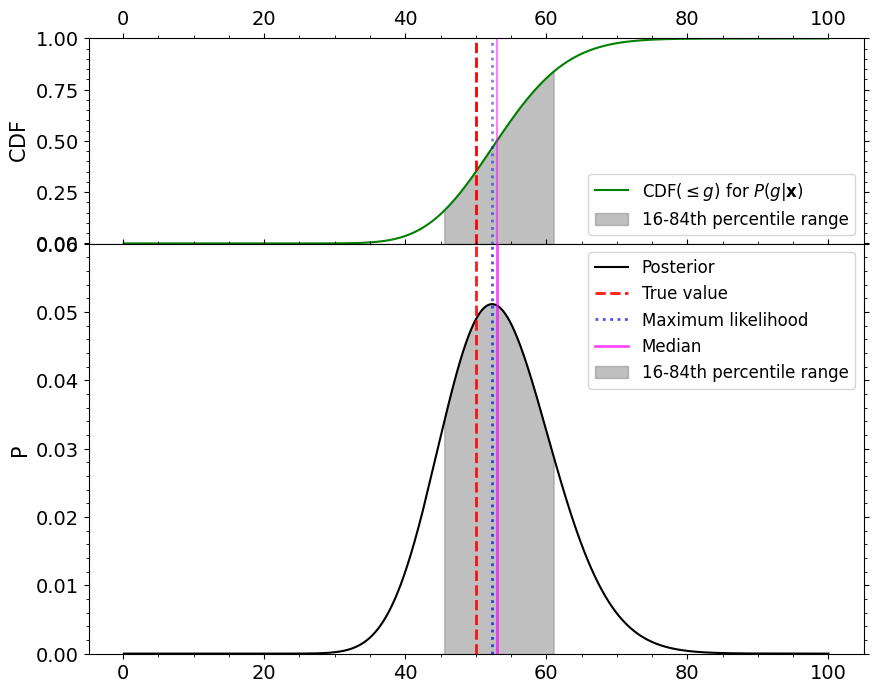

In [8]:
Pr_N_line = np.linspace(100,0,1000,False)
# get the Pr(N_line) as a unifrom distribution without 0
unif_prior = (Pr_N_line[0] - Pr_N_line[-1])**(-1)
# get the distribution

lnLvalues_2 = [-lnL([true_params_N_count[1],true_params_alpha[1],N_line],spectra_wavelength,spectra_k_lam_2) for N_line in Pr_N_line]
# get ln(L)
P_unnorm_2 = np.exp(lnLvalues_2)*unif_prior
P_norm_2 = -scipy.integrate.trapezoid(P_unnorm_2,Pr_N_line)
# add a negative sign due to the 
posterior_2 = P_unnorm_2/P_norm_2
# calculate the posterior
cdf_2 = 1+scipy.integrate.cumulative_trapezoid(posterior_2,Pr_N_line,initial=0)
# get the cdf

cdf_inverse = scipy.interpolate.interp1d(cdf_2,Pr_N_line)
Pr_N_16 = cdf_inverse(0.16)
Pr_N_50 = cdf_inverse(0.50)
Pr_N_84 = cdf_inverse(0.84)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [1, 2], 'hspace': 0.0})

# Plot the CDF in the upper subplot
ax1.plot(Pr_N_line, cdf_2, color='g', label=r'${\rm CDF}(\leq g)$ for $P(g|\mathbf{x})$')
ax1.fill_between(Pr_N_line, -5, cdf_2, where=((Pr_N_line >= Pr_N_16) & (Pr_N_line <= Pr_N_84)), color='gray', alpha=0.5, label='16-84th percentile range', zorder=1)
# vertical lines at the true, maxL, and median values
ax1.axvline(true_params_N_line[1], color='r', linestyle='--', linewidth=2.0)
ax1.axvline(N_line_min_2, color='b', linestyle=':', alpha=0.5, linewidth=2.0)
ax1.axvline(Pr_N_50, color='magenta', linestyle='-', alpha=0.5)

ax1.set_ylabel(r'${\rm CDF}$', fontsize=15)
ax1.legend(loc='lower right', fontsize=12)
ax1.set_ylim(-0.001,1.001)

# Plot the posterior distribution in the lower subplot
ax2.plot(Pr_N_line, posterior_2, color='k', label=r'Posterior')
# vertical lines at the true, maxL, and median values
ax2.axvline(true_params_N_line[1], color='r', linestyle='--', alpha=0.9, linewidth=2.0, label=r'True value', zorder=3)
ax2.axvline(N_line_min_2, color='b', linestyle=':', linewidth=2.0, alpha=0.7, label=r'Maximum likelihood', zorder=3)
ax2.axvline(Pr_N_50, color='magenta', linestyle='-', linewidth=2.0, alpha=0.7, label=r'Median', zorder=4)
ax2.fill_between(Pr_N_line, -10.0, posterior_2, where=((Pr_N_line >= Pr_N_16) & (Pr_N_line <= Pr_N_84)), color='gray', alpha=0.5, label='16-84th percentile range', zorder=1)
ax2.set_ylabel('P', fontsize=15)
ax2.set_ylim(-1e-4,0.06)

# Some tick mark things
ax1.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=False, labeltop=True,labelsize=14)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())


# Some tick mark things
ax2.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labeltop=False, labelsize=14)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

# Add the legend from the upper plot to the lower plot
ax2.legend(loc='upper right', fontsize=12)


plt.show()

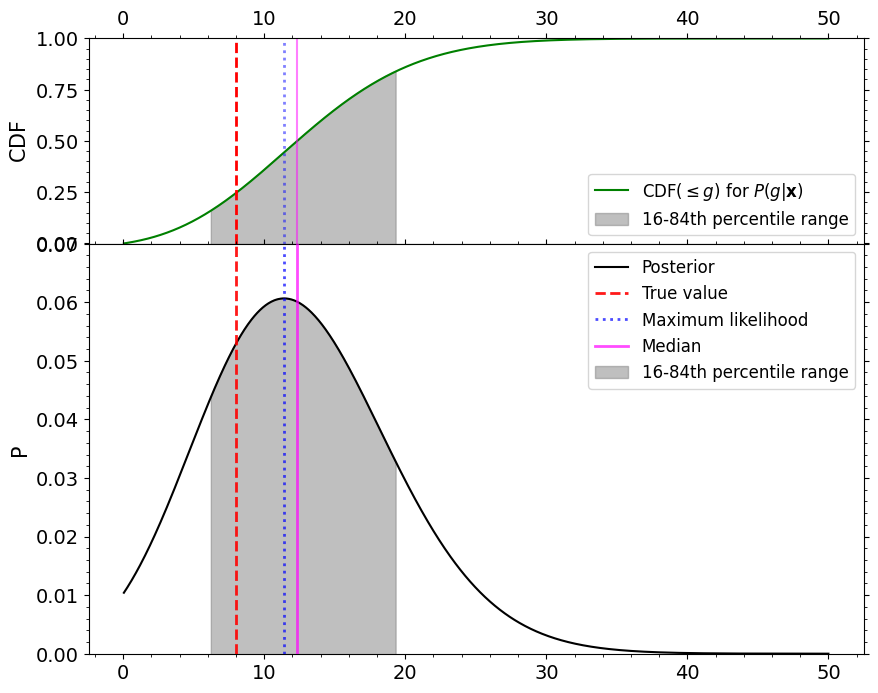

In [9]:
Pr_N_line = np.linspace(50,0,1000,False)
# get the Pr(N_line) as a unifrom distribution without 0
unif_prior = (Pr_N_line[0] - Pr_N_line[-1])**(-1)
# get the distribution

lnLvalues_3 = [-lnL([true_params_N_count[2],true_params_alpha[2],N_line],spectra_wavelength,spectra_k_lam_3) for N_line in Pr_N_line]
# get ln(L)
P_unnorm_3 = np.exp(lnLvalues_3)*unif_prior
P_norm_3 = -scipy.integrate.trapezoid(P_unnorm_3,Pr_N_line)
# add a negative sign due to the 
posterior_3 = P_unnorm_3/P_norm_3
# calculate the posterior
cdf_3 = 1+scipy.integrate.cumulative_trapezoid(posterior_3,Pr_N_line,initial=0)
# get the cdf

cdf_inverse = scipy.interpolate.interp1d(cdf_3,Pr_N_line)
Pr_N_16 = cdf_inverse(0.16)
Pr_N_50 = cdf_inverse(0.50)
Pr_N_84 = cdf_inverse(0.84)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [1, 2], 'hspace': 0.0})

# Plot the CDF in the upper subplot
ax1.plot(Pr_N_line, cdf_3, color='g', label=r'${\rm CDF}(\leq g)$ for $P(g|\mathbf{x})$')
ax1.fill_between(Pr_N_line, -5, cdf_3, where=((Pr_N_line >= Pr_N_16) & (Pr_N_line <= Pr_N_84)), color='gray', alpha=0.5, label='16-84th percentile range', zorder=1)
# vertical lines at the true, maxL, and median values
ax1.axvline(true_params_N_line[2], color='r', linestyle='--', linewidth=2.0)
ax1.axvline(N_line_min_3, color='b', linestyle=':', alpha=0.5, linewidth=2.0)
ax1.axvline(Pr_N_50, color='magenta', linestyle='-', alpha=0.5)

ax1.set_ylabel(r'${\rm CDF}$', fontsize=15)
ax1.legend(loc='lower right', fontsize=12)
ax1.set_ylim(-0.001,1.001)

# Plot the posterior distribution in the lower subplot
ax2.plot(Pr_N_line, posterior_3, color='k', label=r'Posterior')
# vertical lines at the true, maxL, and median values
ax2.axvline(true_params_N_line[2], color='r', linestyle='--', alpha=0.9, linewidth=2.0, label=r'True value', zorder=3)
ax2.axvline(N_line_min_3, color='b', linestyle=':', linewidth=2.0, alpha=0.7, label=r'Maximum likelihood', zorder=3)
ax2.axvline(Pr_N_50, color='magenta', linestyle='-', linewidth=2.0, alpha=0.7, label=r'Median', zorder=4)
ax2.fill_between(Pr_N_line, -10.0, posterior_3, where=((Pr_N_line >= Pr_N_16) & (Pr_N_line <= Pr_N_84)), color='gray', alpha=0.5, label='16-84th percentile range', zorder=1)
ax2.set_ylabel('P', fontsize=15)
ax2.set_ylim(-1e-4,0.07)

# Some tick mark things
ax1.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=False, labeltop=True,labelsize=14)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())


# Some tick mark things
ax2.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labeltop=False, labelsize=14)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

# Add the legend from the upper plot to the lower plot
ax2.legend(loc='upper right', fontsize=12)


plt.show()

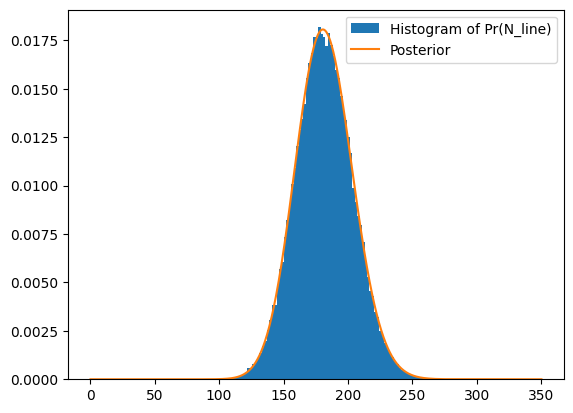

In [15]:
# f)

unifrom_sample = np.random.uniform(0,1,100000)
# generate a random unifrom sample
Pr_N_line = np.linspace(350,0,1000,False)
cdf_inverse = scipy.interpolate.interp1d(cdf_1,Pr_N_line)
Pr_N_samples = cdf_inverse(unifrom_sample)
# get the sample
plt.hist(Pr_N_samples,100,density=True,label='Histogram of Pr(N_line)')
plt.plot(Pr_N_line,posterior_1,label='Posterior')
# get the values
plt.legend()


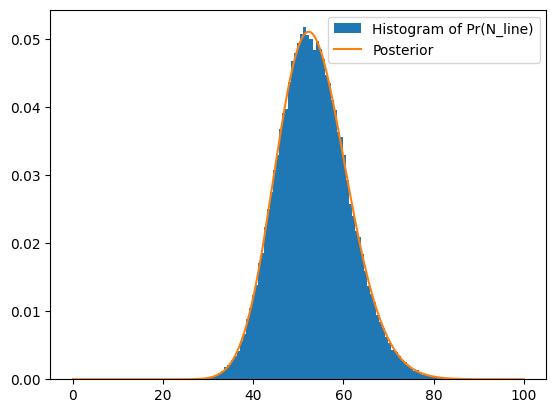

In [18]:
Pr_N_line = np.linspace(100,0,1000,False)
cdf_inverse = scipy.interpolate.interp1d(cdf_2,Pr_N_line)
Pr_N_samples = cdf_inverse(unifrom_sample)
# get the sample
plt.hist(Pr_N_samples,100,density=True,label='Histogram of Pr(N_line)')
plt.plot(Pr_N_line,posterior_2,label='Posterior')
# get the values
plt.legend()


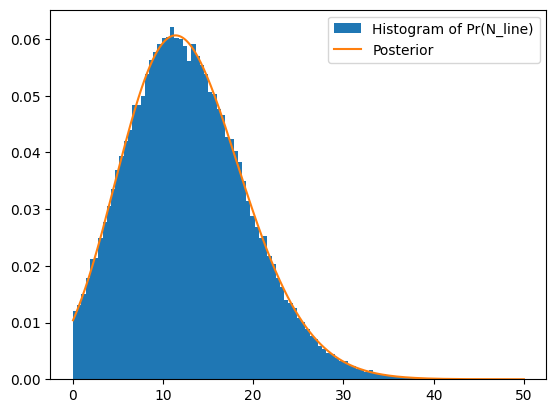

In [19]:
Pr_N_line = np.linspace(50,0,1000,False)
cdf_inverse = scipy.interpolate.interp1d(cdf_3,Pr_N_line)
Pr_N_samples = cdf_inverse(unifrom_sample)
# get the sample
plt.hist(Pr_N_samples,100,density=True,label='Histogram of Pr(N_line)')
plt.plot(Pr_N_line,posterior_3,label='Posterior')
# get the values
plt.legend()


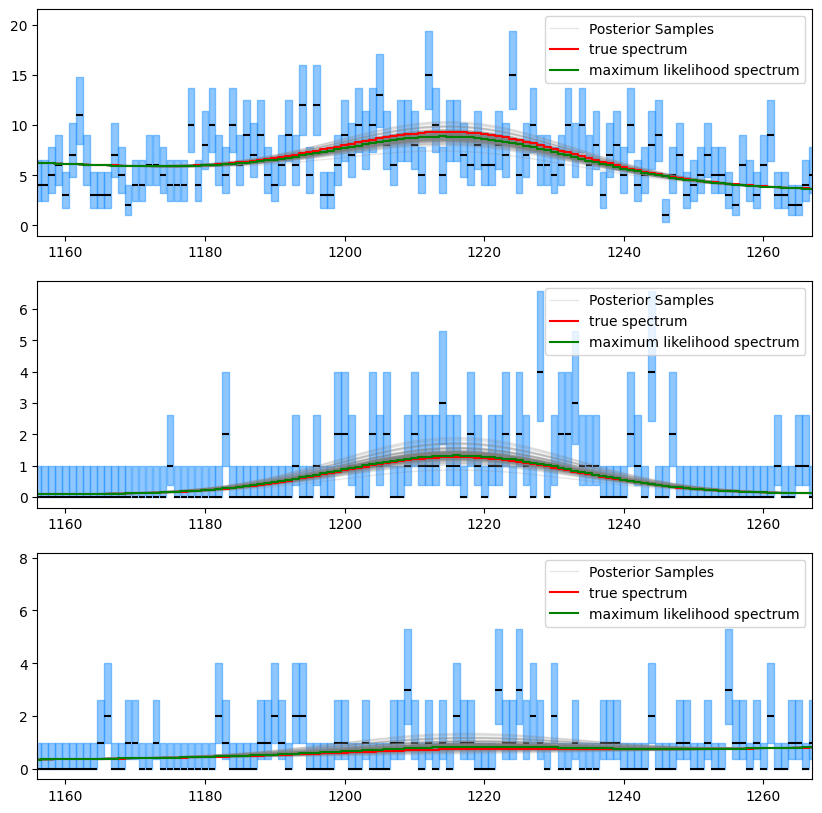

In [31]:
# g)

unifrom_sample = np.random.uniform(0,1,100)
# generate a random unifrom sample
fig, ax = plt.subplots(3,1,figsize = (10,10))

Pr_N_line = np.linspace(350,0,1000,False)
cdf_inverse = scipy.interpolate.interp1d(cdf_1,Pr_N_line)
Pr_N_samples = cdf_inverse(unifrom_sample)
# get the general configeration of diagram
plot_spectrum(ax[0],spectra_wavelength,spectra_k_lam_1)
for ip,Pr_N in enumerate(Pr_N_samples):
    sample_line = true_params_N_count[0]*(spectra_wavelength/1200)**true_params_alpha[0]+Pr_N*np.exp(-0.5 * ((spectra_wavelength - 1216) / 17) ** 2) / (17 * np.sqrt(2 * np.pi))
    ax[0].plot(spectra_wavelength,sample_line,'gray', alpha=0.2, linewidth=1, label='Posterior Samples' if ip==0 else None)
ax[0].plot(spectra_wavelength,true_params_N_lam_1,color='red',drawstyle='steps-mid',label='true spectrum')
ax[0].plot(spectra_wavelength,maxL_N_line_lam_1,color='green',drawstyle='steps-mid',label='maximum likelihood spectrum')
ax[0].set_xlim(1156,1267)
ax[0].legend()
# plot the first graph

Pr_N_line = np.linspace(100,0,1000,False)
cdf_inverse = scipy.interpolate.interp1d(cdf_2,Pr_N_line)
Pr_N_samples = cdf_inverse(unifrom_sample)
plot_spectrum(ax[1],spectra_wavelength,spectra_k_lam_2)
for ip,Pr_N in enumerate(Pr_N_samples):
    sample_line = true_params_N_count[1]*(spectra_wavelength/1200)**true_params_alpha[1]+Pr_N*np.exp(-0.5 * ((spectra_wavelength - 1216) / 17) ** 2) / (17 * np.sqrt(2 * np.pi))
    ax[1].plot(spectra_wavelength,sample_line,'gray', alpha=0.2, linewidth=1, label='Posterior Samples' if ip==0 else None)
ax[1].plot(spectra_wavelength,true_params_N_lam_2,color='red',drawstyle='steps-mid',label='true spectrum')
ax[1].plot(spectra_wavelength,maxL_N_line_lam_2,color='green',drawstyle='steps-mid',label='maximum likelihood spectrum')
ax[1].set_xlim(1156,1267)
ax[1].legend()
# plot the second graph

Pr_N_line = np.linspace(50,0,1000,False)
cdf_inverse = scipy.interpolate.interp1d(cdf_3,Pr_N_line)
Pr_N_samples = cdf_inverse(unifrom_sample)
plot_spectrum(ax[2],spectra_wavelength,spectra_k_lam_3)
for ip,Pr_N in enumerate(Pr_N_samples):
    sample_line = true_params_N_count[2]*(spectra_wavelength/1200)**true_params_alpha[2]+Pr_N*np.exp(-0.5 * ((spectra_wavelength - 1216) / 17) ** 2) / (17 * np.sqrt(2 * np.pi))
    ax[2].plot(spectra_wavelength,sample_line,'gray', alpha=0.2, linewidth=1, label='Posterior Samples' if ip==0 else None)
ax[2].plot(spectra_wavelength,true_params_N_lam_3,color='red',drawstyle='steps-mid',label='true spectrum')
ax[2].plot(spectra_wavelength,maxL_N_line_lam_3,color='green',drawstyle='steps-mid',label='maximum likelihood spectrum')
ax[2].set_xlim(1156,1267)
ax[2].legend()
# plot the third graph